# Final Visualization Report

## DATA HANDLING AND VISUALISATION 

## Module Leader: Dr. Michael Kuhn

## Student Name: Rabia Akhtar
## Student ID:   23031641

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Data Preparation and read the csv file into a DataFrame
df = pd.read_csv('Orange Quality Data.csv')

In [3]:
# Display basic information about the dataset
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [4]:
# Understanding the data using describe 
df.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


In [5]:
df['Color'].value_counts()

Color
Deep Orange      75
Light Orange     64
Orange-Red       55
Orange           38
Yellow-Orange     9
Name: count, dtype: int64

In [6]:
# Remove the empty entiries
df = df.dropna()

In [7]:
# Check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


### Statistical Treatment on Data 

In [8]:
df.corr(numeric_only=True)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
Size (cm),1.000000,0.305348,-0.305865,0.330487,0.236863,0.313330,-0.256665,-0.243113
Weight (g),0.305348,1.000000,-0.239659,0.303806,0.316806,0.374670,-0.260454,-0.330268
Brix (Sweetness),-0.305865,-0.239659,1.000000,-0.300080,-0.344376,-0.329862,0.144666,0.631343
pH (Acidity),0.330487,0.303806,-0.300080,1.000000,0.360222,0.262461,-0.232627,-0.321942
Softness (1-5),0.236863,0.316806,-0.344376,0.360222,1.000000,0.331103,-0.202404,-0.302732
HarvestTime (days),0.313330,0.374670,-0.329862,0.262461,0.331103,1.000000,-0.268691,-0.474754
Ripeness (1-5),-0.256665,-0.260454,0.144666,-0.232627,-0.202404,-0.268691,1.000000,0.280764
Quality (1-5),-0.243113,-0.330268,0.631343,-0.321942,-0.302732,-0.474754,0.280764,1.000000


In [9]:
# Statistics on DataFrame
# Mean, Median, Standard Deviation etc
def major_statistics():

    # mean and median:
    mean_value = df.mean(numeric_only=True)
    median_value = df.median(numeric_only=True)

    # standard deviation
    std_deviation = df.std(numeric_only=True)
    
    skewness = df.skew(numeric_only=True)
    kurtosis = df.kurt(numeric_only=True)

    print("\033[1mMean:\n\033[0m", mean_value)
    print("\n\033[1mMedian:\n\033[0m", median_value)
    print("\n\033[1mStandard Deviation:\n\033[0m", std_deviation)
    print("\n\033[1mSkewness:\n\033[0m", skewness)
    print("\n\033[1mKurtosis:\n\033[0m", kurtosis)
    return

In [10]:
major_statistics()

Mean:
 Size (cm)               7.844813
Weight (g)            205.128631
Brix (Sweetness)       10.907884
pH (Acidity)            3.473900
Softness (1-5)          3.072614
HarvestTime (days)     15.344398
Ripeness (1-5)          3.599585
Quality (1-5)           3.817427
dtype: float64

Median:
 Size (cm)               7.8
Weight (g)            205.0
Brix (Sweetness)       11.0
pH (Acidity)            3.4
Softness (1-5)          3.0
HarvestTime (days)     15.0
Ripeness (1-5)          4.0
Quality (1-5)           4.0
dtype: float64

Standard Deviation:
 Size (cm)              1.086002
Weight (g)            56.461012
Brix (Sweetness)       2.760446
pH (Acidity)           0.421007
Softness (1-5)         1.323630
HarvestTime (days)     5.323852
Ripeness (1-5)         1.205214
Quality (1-5)          1.014410
dtype: float64

Skewness:
 Size (cm)             0.154563
Weight (g)           -0.048942
Brix (Sweetness)     -0.034067
pH (Acidity)          0.379275
Softness (1-5)       -0.067155
Harve

In [11]:
# Calculate skewness for each column
for column in df.select_dtypes(include=[np.number]).columns:
    skewness_per_column = df[column].skew()
    print(f"Skewness for {column}: {skewness_per_column}")

Skewness for Size (cm): 0.15456311300244854
Skewness for Weight (g): -0.048941969729031316
Skewness for Brix (Sweetness): -0.03406710137449985
Skewness for pH (Acidity): 0.37927481481253217
Skewness for Softness (1-5): -0.06715482184658936
Skewness for HarvestTime (days): -0.04045902298553126
Skewness for Ripeness (1-5): -0.5943341606203865
Skewness for Quality (1-5): -0.9338634693931638


## Plotting the Graphs

## 1- Line Plot

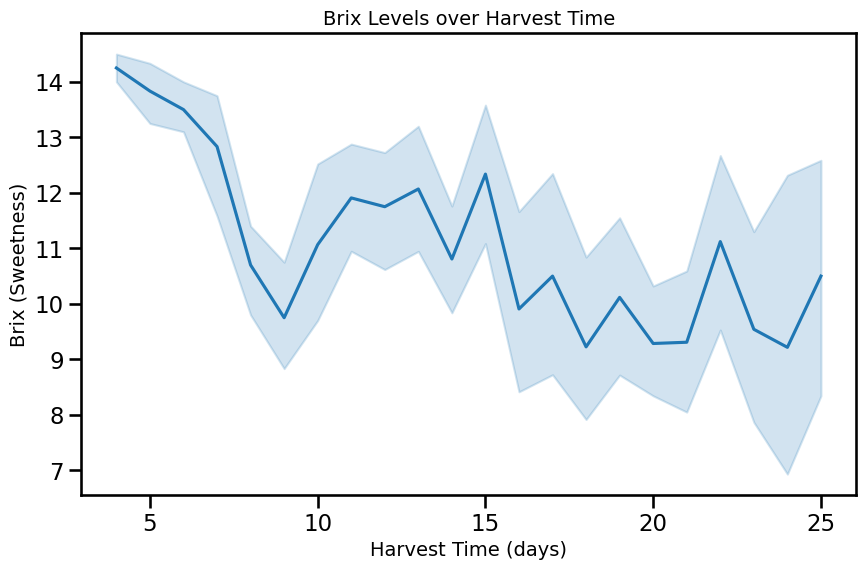

In [12]:
# Line plot: Brix levels over Harvest Time
plt.figure(figsize=(10, 6))
sns.set_context("talk")
sns.lineplot(x='HarvestTime (days)', y='Brix (Sweetness)', data=df)

plt.title('Brix Levels over Harvest Time' , fontsize=14)
plt.xlabel('Harvest Time (days)' , fontsize=14)
plt.ylabel('Brix (Sweetness)' , fontsize=14)

# Save plot as a PNG image
plt.savefig('Lineplot.png', dpi=600 , bbox_inches='tight')

plt.show()

## 2- Box Plot (Relation Between Color and Ripeness)

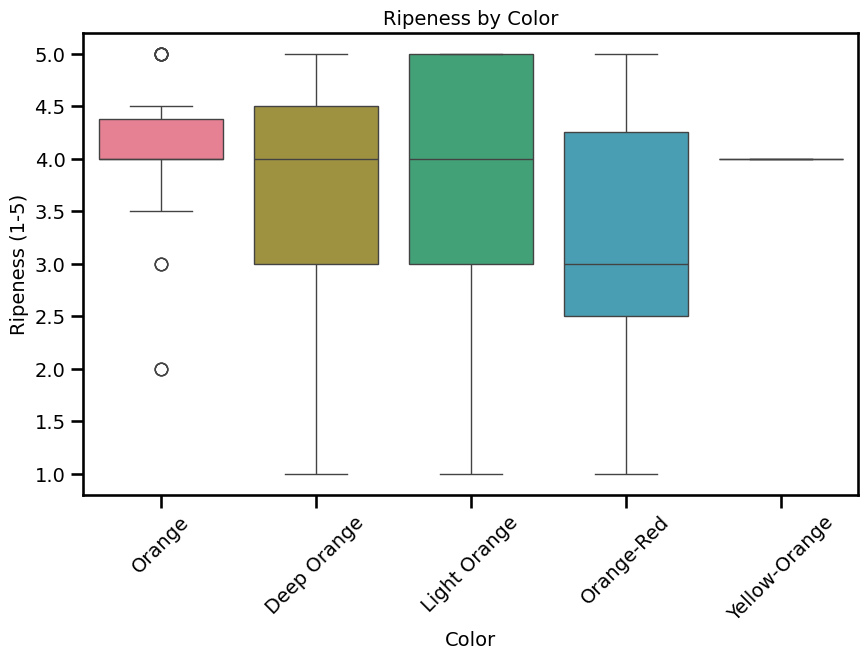

In [13]:
# Create a box plot to visualize the relationship between Color and Ripeness
plt.figure(figsize=(10, 6))

# Create a visualization
sns.boxplot(x = 'Color' , y = 'Ripeness (1-5)', data=df , hue = 'Color' , palette='husl', legend=False)

plt.xlabel('Color' , fontsize=14)
plt.ylabel('Ripeness (1-5)' , fontsize=14)
plt.title('Ripeness by Color' , fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=45)

# Save plot as a PNG image
plt.savefig('boxplot.png', dpi=600 , bbox_inches='tight')

plt.show()

## 3- Heat Map (Plotting a diagonal correlation matrix)

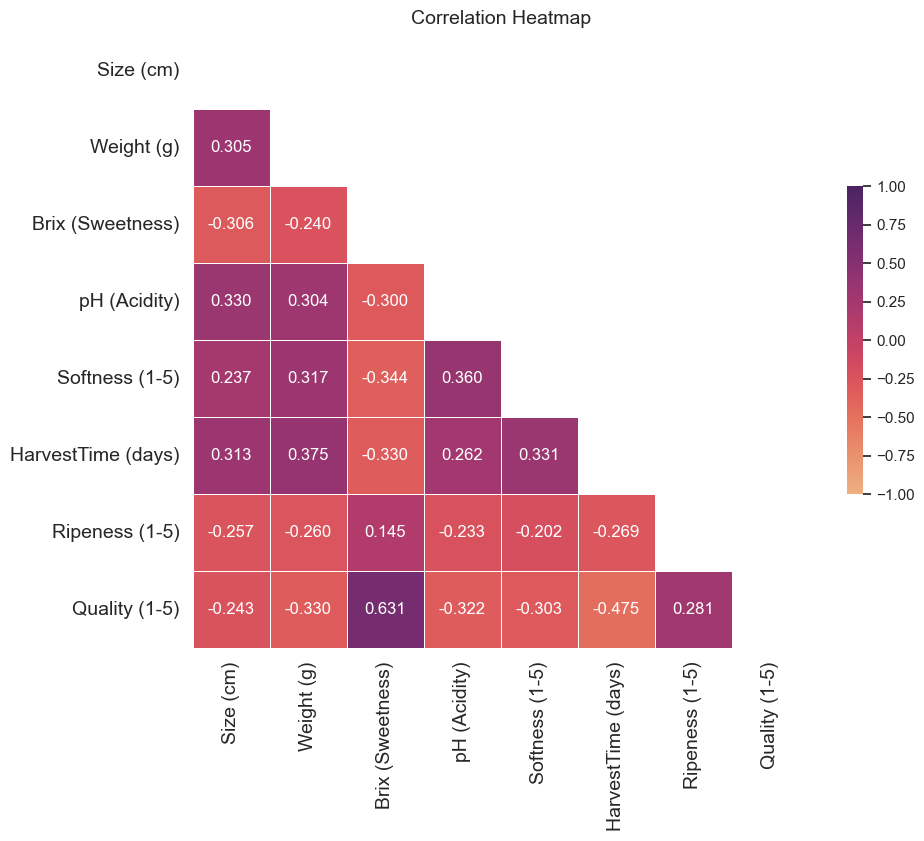

In [14]:
# Create correlation matrix
correlation_matrix = df.corr(numeric_only=True)
sns.set_theme(style="white")

# Plot heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix)) 

# Create a visualization
sns.heatmap(correlation_matrix, annot=True, mask=mask , cmap='flare' , fmt=".3f", vmin=-1, vmax=1, center=0 , square=True , linewidth=.5 , cbar_kws={"shrink": .5})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
        
# Add title
plt.title('Correlation Heatmap' , fontsize=14)

# Save plot as a PNG image
plt.savefig('heatmap.png', dpi=600 , bbox_inches='tight')

# Display the plot
plt.show()


## 4- Pie Chart (Hatch slices)

#### Pass a list of hatch patterns to hatch to set the pattern of each slice.

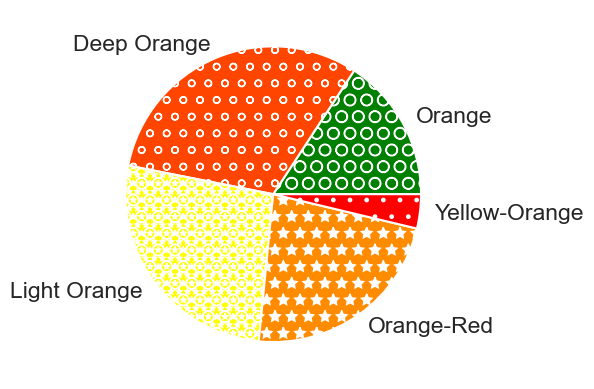

In [15]:
# Create a new figure and axis for the pie chart
fig, ax = plt.subplots()
sns.set_context("talk")

# Extract unique categories (colors) from the DataFrame
category = df['Color'].unique()

# Count occurrences of each category (color)
category_count = df['Color'].value_counts()

# Labels for the pie chart slices
labels = category

# Sizes (counts) for each slice of the pie chart
sizes = [category_count[cat] for cat in category]

# Create the pie chart
ax.pie(sizes, labels=labels, 
       colors=['green', 'orangered', 'yellow', 'darkorange', 'red'], 
       hatch=['O', 'o', '**O', '*', '.'])

# Save plot as a PNG image
plt.savefig('Pieplot.png', dpi=600)
plt.show()

## 5- Distribution(Histogram) Visualization

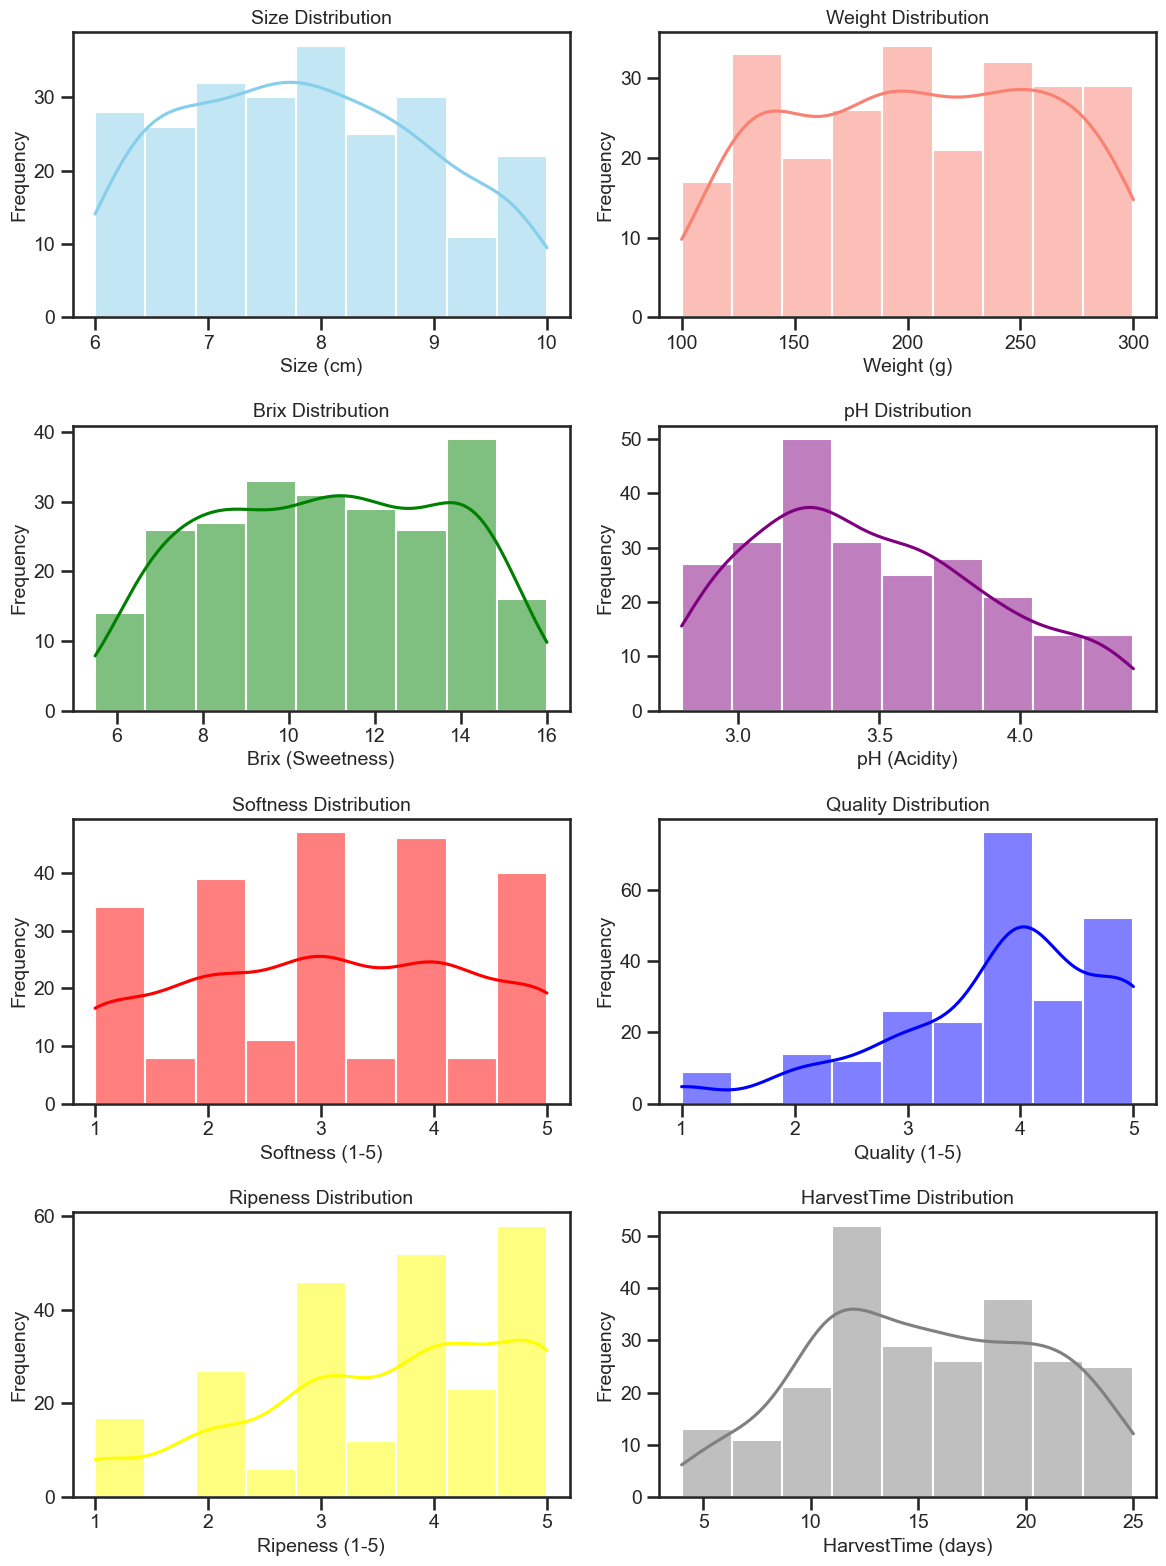

In [16]:
# Visualizing the distribution of numerical variables using histograms
plt.figure(figsize=(12, 16))
sns.set_context("talk")
sns.set_style("ticks")

# Creating 8 subplots 
# Histogram for Size
plt.subplot(4, 2, 1)

# Create a visualization
sns.histplot(df['Size (cm)'], kde=True, color='skyblue')
plt.title('Size Distribution' , fontsize=14)
plt.xlabel('Size (cm)' , fontsize=14)
plt.ylabel('Frequency' , fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Histogram for Weight
plt.subplot(4, 2, 2)
sns.histplot(df['Weight (g)'], kde=True, color='salmon')
plt.title('Weight Distribution' , fontsize=14)
plt.xlabel('Weight (g)' , fontsize=14)
plt.ylabel('Frequency' , fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Histogram for Brix
plt.subplot(4, 2, 3)
sns.histplot(df['Brix (Sweetness)'], kde=True, color='green')
plt.title('Brix Distribution' , fontsize=14)
plt.xlabel('Brix (Sweetness)' , fontsize=14)
plt.ylabel('Frequency' , fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Histogram for pH
plt.subplot(4, 2, 4)
sns.histplot(df['pH (Acidity)'], kde=True, color='purple')
plt.title('pH Distribution' , fontsize=14)
plt.xlabel('pH (Acidity)' , fontsize=14)
plt.ylabel('Frequency' , fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Histogram for Softness
plt.subplot(4, 2, 5)
sns.histplot(df['Softness (1-5)'], kde=True, color='red')
plt.title('Softness Distribution' , fontsize=14)
plt.xlabel('Softness (1-5)' , fontsize=14)
plt.ylabel('Frequency' , fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Histogram for Quality
plt.subplot(4, 2, 6)
sns.histplot(df['Quality (1-5)'], kde=True, color='blue')
plt.title('Quality Distribution' , fontsize=14)
plt.xlabel('Quality (1-5)' , fontsize=14)
plt.ylabel('Frequency' , fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Histogram for Ripeness
plt.subplot(4, 2, 7)
sns.histplot(df['Ripeness (1-5)'], kde=True, color='yellow')
plt.title('Ripeness Distribution' , fontsize=14)
plt.xlabel('Ripeness (1-5)' , fontsize=14)
plt.ylabel('Frequency' , fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Histogram for HarvestTime
plt.subplot(4, 2, 8)
sns.histplot(df['HarvestTime (days)'], kde=True, color='gray')
plt.title('HarvestTime Distribution' , fontsize=14)
plt.xlabel('HarvestTime (days)' , fontsize=14)
plt.ylabel('Frequency' , fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# set spacing
plt.tight_layout()

plt.show()

## 6- KDE Plot

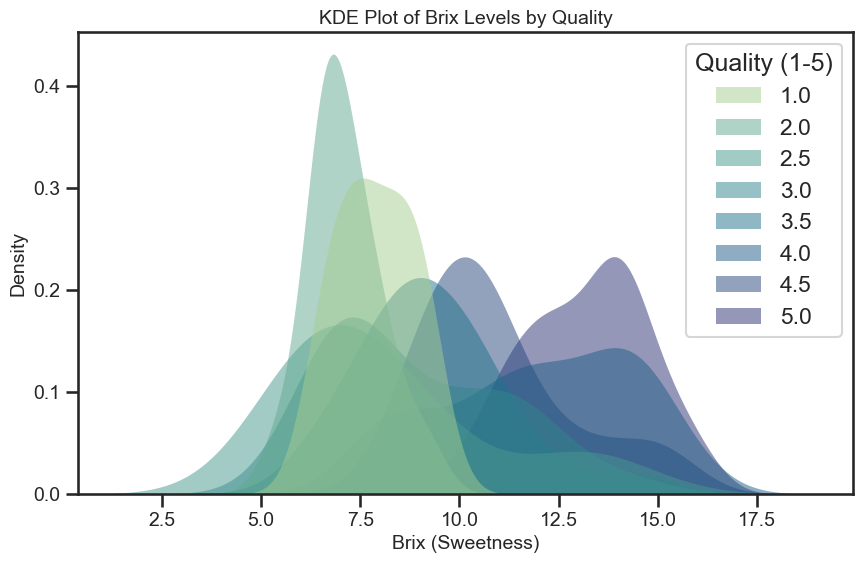

In [17]:
# Create a visualization
sns.set_context("talk")
sns.set_style("ticks")

plt.figure(figsize=(10, 6))
sns.kdeplot(x='Brix (Sweetness)', hue='Quality (1-5)', data=df, fill=True, common_norm=False , palette="crest" , alpha=.5, linewidth=0)

plt.title('KDE Plot of Brix Levels by Quality' , fontsize=14)
plt.xlabel('Brix (Sweetness)' , fontsize=14)
plt.ylabel('Density' , fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save plot as a PNG image
plt.savefig('KDEplot.png', dpi=600 , bbox_inches='tight')
plt.show()

## 7- Violin plot

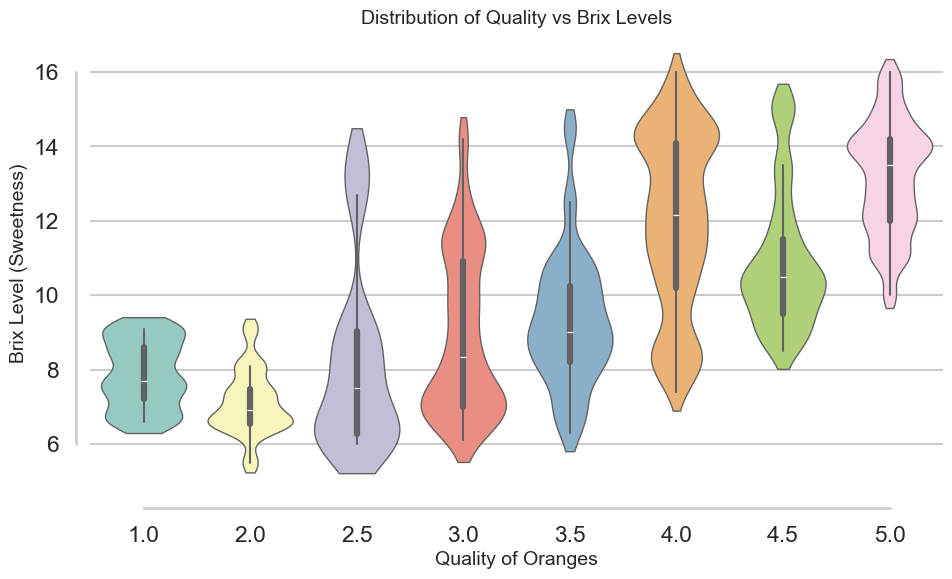

In [18]:
# Set up the matplotlib figure
sns.set_theme(style="whitegrid")
sns.set_context("talk")

plt.figure(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='Quality (1-5)', y='Brix (Sweetness)', hue='Quality (1-5)', data=df, bw_adjust=.5, cut=1 , linewidth=1, palette="Set3" , legend=False )
plt.title('Distribution of Quality vs Brix Levels' , fontsize=14)
plt.xlabel('Quality of Oranges' , fontsize=14)
plt.ylabel('Brix Level (Sweetness)' , fontsize=14)

plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(offset=10, trim=True)

# Save plot as a PNG image
plt.savefig('Violinplot.png', dpi=600 , bbox_inches='tight')
plt.show()

## 8- Pairplot

##### It shows joint and marginal distributions but rather than focusing on a single relationship, it visualizes every pairwise combination of variables simultaneously:

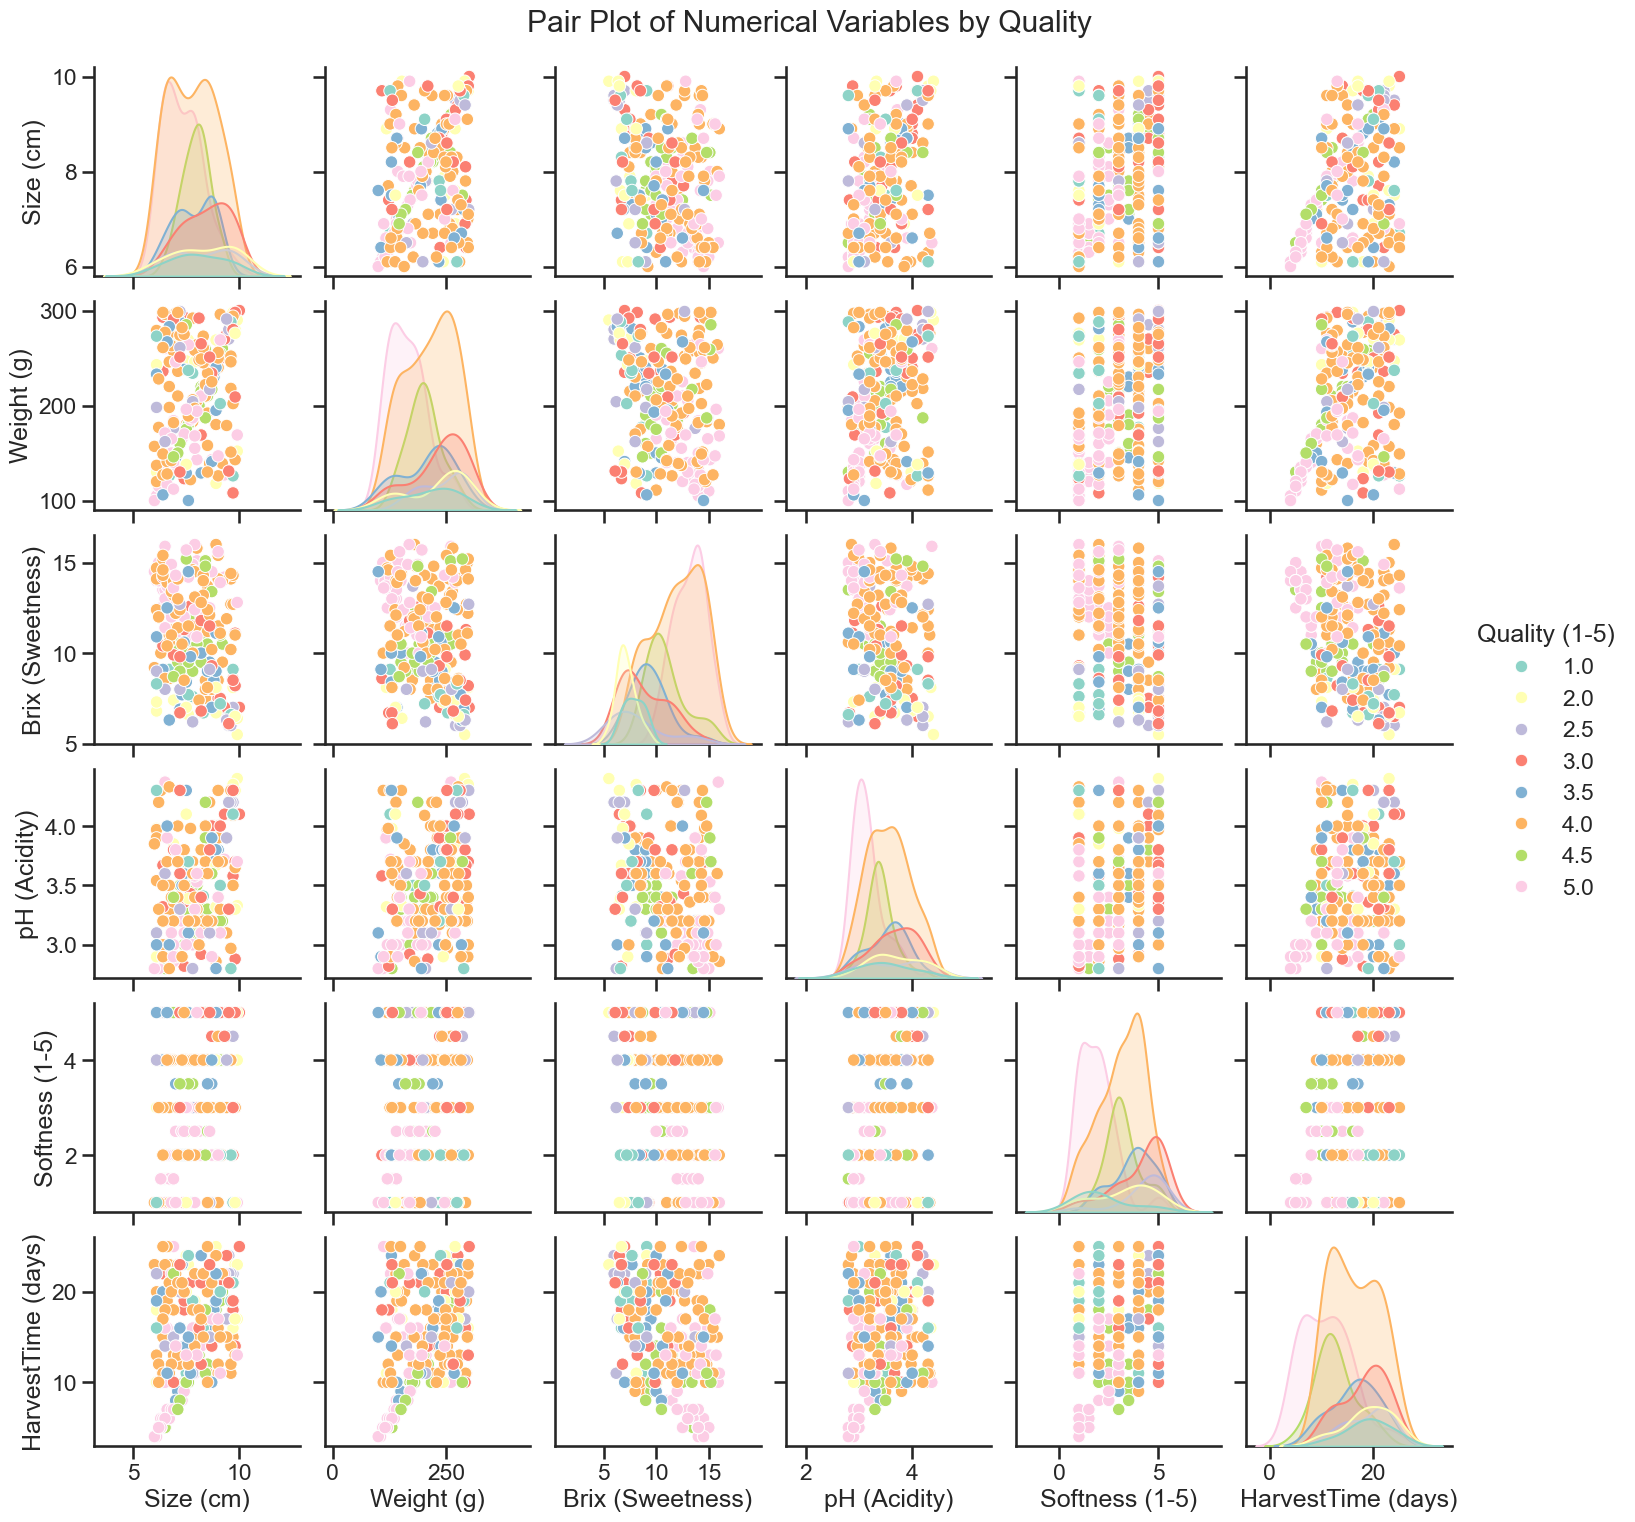

In [19]:
# Graph of Pair Plot
sns.set_style("ticks")
sns.set_context("talk")

sns.pairplot(df, vars=['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'HarvestTime (days)'], hue='Quality (1-5)', palette="Set3" , height=2.5)
plt.suptitle('Pair Plot of Numerical Variables by Quality', y=1.02)

# Save plot as a PNG image
plt.savefig('Pairplot.png', dpi=600 , bbox_inches='tight')
plt.show()

## 9- Box plot to visualize the distribution of Quality rating across top blemish types

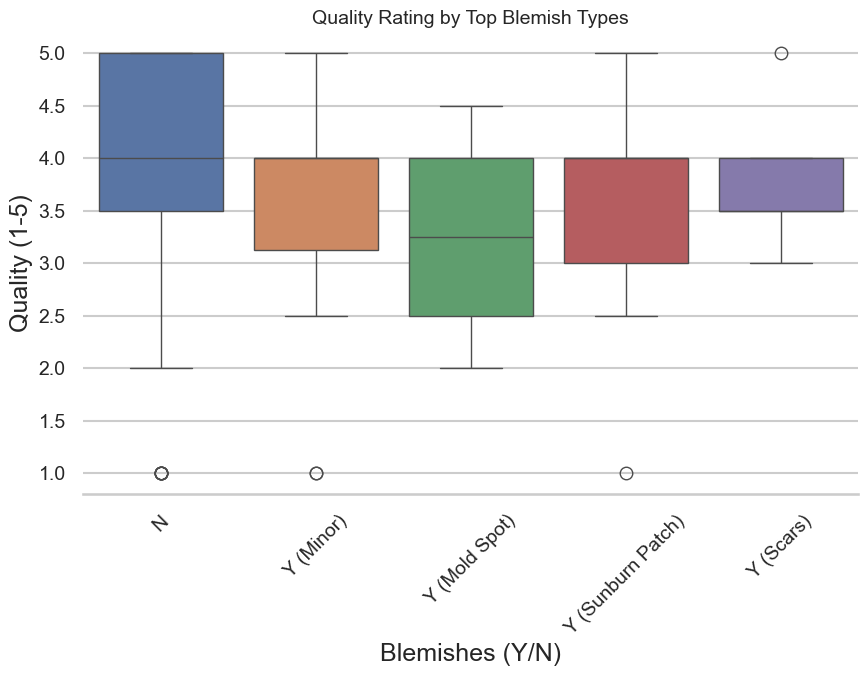

In [20]:
# Create box plot to visualize the distribution of Quality rating across top blemish types
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

top_blemish_types = df['Blemishes (Y/N)'].value_counts().head(5).index.tolist()
top_data = df[df['Blemishes (Y/N)'].isin(top_blemish_types)]

# Create a visualization
sns.boxplot(x='Blemishes (Y/N)', y='Quality (1-5)', data=top_data , hue='Blemishes (Y/N)' , palette="deep" )

plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Quality Rating by Top Blemish Types' , fontsize=14)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(left=True)

# Save plot as a PNG image
plt.savefig('Boxplot Quality rating across top blemish types.png', dpi=100 , bbox_inches='tight')
plt.show()

## 10- Box plots (Visualization of distribution of other features across top blemish types)

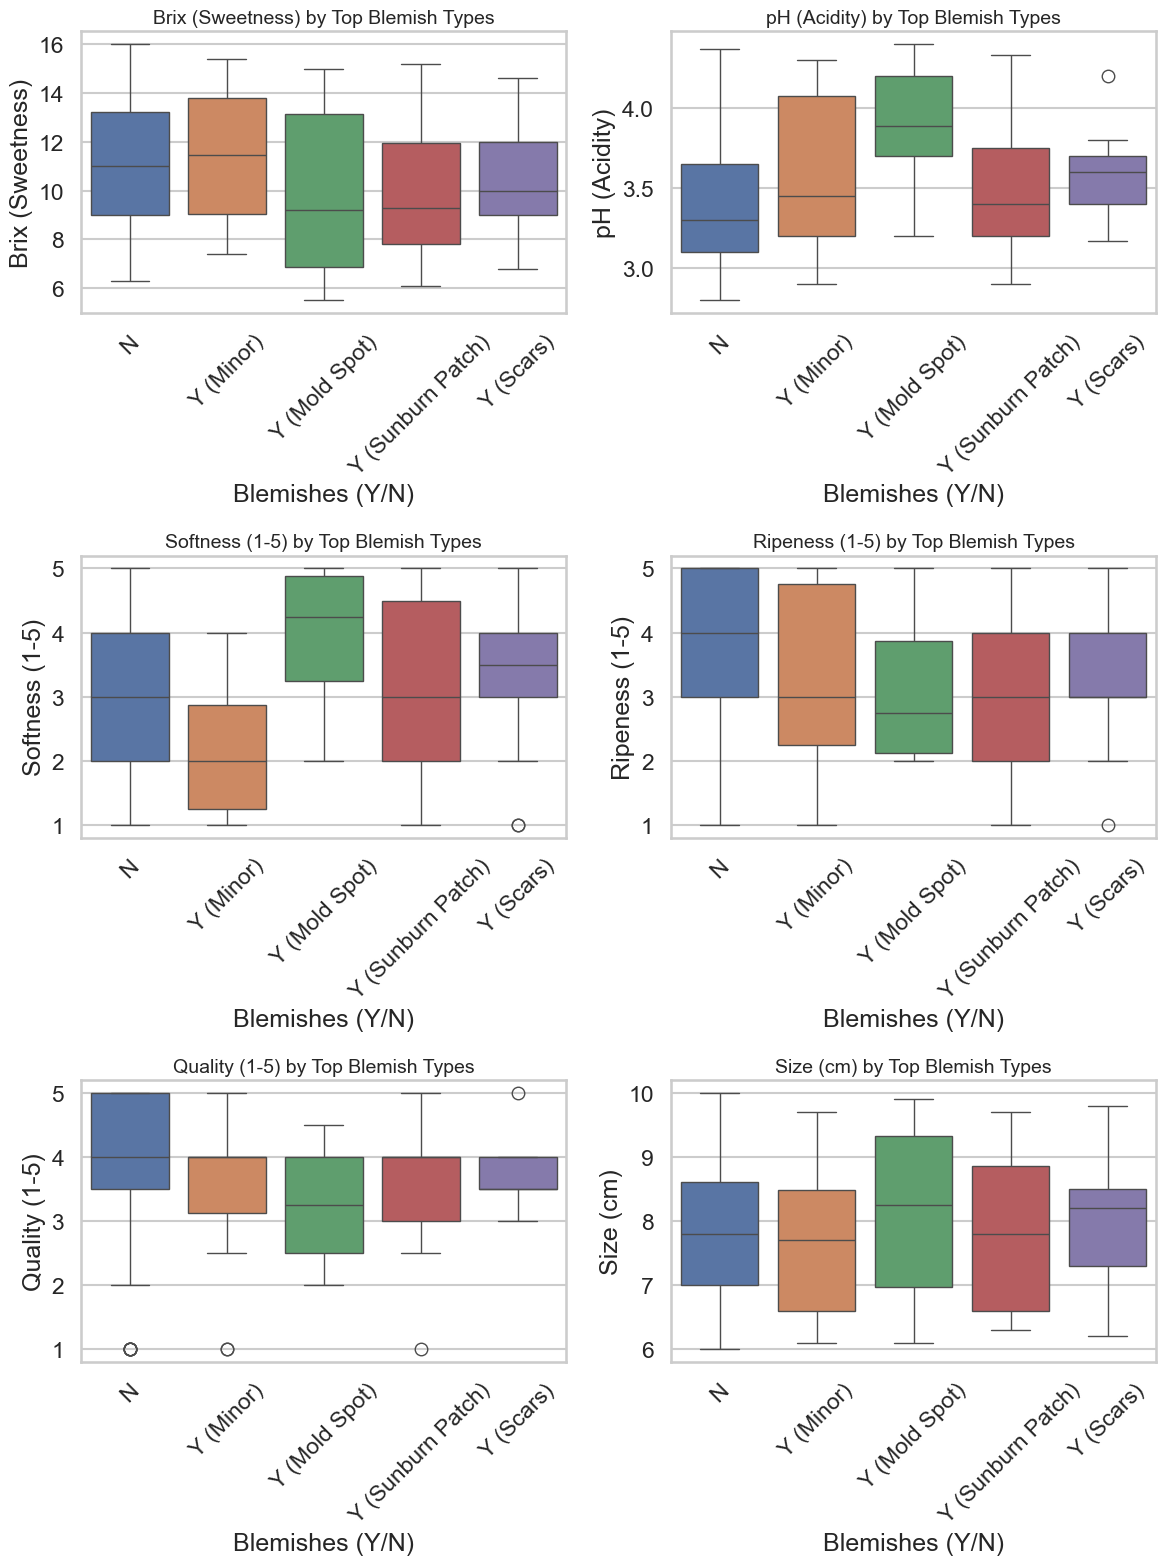

In [25]:
# Create box plots to visualize the distribution of other features across top blemish types

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))
axes = axes.flatten()

for i, feature in enumerate(['Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'Ripeness (1-5)' , 'Quality (1-5)' , 'Size (cm)']):
    top_blemish_types = df['Blemishes (Y/N)'].value_counts().head(5).index.tolist()
    top_data = df[df['Blemishes (Y/N)'].isin(top_blemish_types)]

    # Create a visualization
    sns.boxplot(x='Blemishes (Y/N)', y=feature, data=top_data, ax=axes[i] , hue = 'Blemishes (Y/N)' , palette='deep')
    axes[i].set_title(f'{feature} by Top Blemish Types' , fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

# display the plots
plt.show()

In [22]:
# Group the data by 'Variety' and calculate the mean/median for each group
blemish_stats = top_data.groupby('Blemishes (Y/N)')[['Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'Ripeness (1-5)', 'Quality (1-5)']].agg(['mean','median'])

# Print the mean/median values for each feature and blemish type
print("Mean/Median Values by Blemish Type:")
print(blemish_stats)

Mean/Median Values by Blemish Type:
                  Brix (Sweetness)        pH (Acidity)        Softness (1-5)  \
                              mean median         mean median           mean   
Blemishes (Y/N)                                                                
N                        11.022148  11.00     3.382148   3.30       2.986577   
Y (Minor)                11.357143  11.45     3.571429   3.45       2.178571   
Y (Mold Spot)             9.930000   9.20     3.908000   3.89       4.000000   
Y (Scars)                10.441176  10.00     3.585882   3.60       3.382353   
Y (Sunburn Patch)        10.078261   9.30     3.505652   3.40       3.086957   

                         Ripeness (1-5)        Quality (1-5)         
                  median           mean median          mean median  
Blemishes (Y/N)                                                      
N                   3.00       3.906040   4.00      3.993289   4.00  
Y (Minor)           2.00       3.357143   3